# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("Advertising.csv")

# Вывод первых строк DataFrame для проверки
print(data.head())


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
# Проверка на пропуски
missing_values = data.isnull().sum()
print("Пропуски в данных:\n", missing_values)

# Удаление строк с пропусками (если есть)
data_cleaned = data.dropna()

# Проверка, остались ли пропуски после удаления
missing_values_after = data_cleaned.isnull().sum()
print("\nПропуски после очистки:\n", missing_values_after)


Пропуски в данных:
 Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Пропуски после очистки:
 Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
import numpy as np

# Определяем предикторы (X) и целевую переменную (y)
X = data_cleaned[['TV', 'radio', 'newspaper']].to_numpy()  # Преобразуем предикторы в массив NumPy
y = data_cleaned['sales'].to_numpy()  # Преобразуем целевую переменную в массив NumPy

# Выводим размеры массивов для проверки
print("Размер X:", X.shape)
print("Размер y:", y.shape)


Размер X: (200, 3)
Размер y: (200,)


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Реализация координатного спуска
def coordinate_descent(X, y, iterations=1000):
    """
    Реализация координатного спуска для линейной регрессии.
    """
    m, n = X.shape
    w = np.zeros(n)  # Вектор весов (нулевой начальный)
    r = y.copy()  # Остатки

    for it in range(iterations):
        for j in range(n):
            # Вычисление промежуточных остатков без учета текущего веса w_j
            r_j = r + X[:, j] * w[j]
            
            # Обновление веса w_j
            w[j] = np.dot(X[:, j], r_j) / np.dot(X[:, j], X[:, j])
            
            # Обновление остатков r с учетом нового значения w_j
            r = r_j - X[:, j] * w[j]

    return w

# Генерация данных для примера
np.random.seed(42)
X = np.random.rand(100, 4)
y = np.random.rand(100)

# Нормализация данных
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Применение координатного спуска
weights_cd = coordinate_descent(X_normalized, y)
print("Веса из координатного спуска:", weights_cd)

Веса из координатного спуска: [-0.01862267 -0.05446683  0.00766176  0.0506018 ]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_normalized, y)
weights_lr = model.coef_

# Сравнение результатов
print("Веса из sklearn LinearRegression:", weights_lr)

[0.20906117 0.01904183 0.28351533 0.43483029]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [9]:
# Масштабирование столбцов матрицы X
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Проверим результаты
print("Среднее значение по каждому столбцу (после масштабирования):", np.mean(X_scaled, axis=0))
print("Стандартное отклонение по каждому столбцу (после масштабирования):", np.std(X_scaled, axis=0))


Среднее значение по каждому столбцу (после масштабирования): [ 1.00000000e+00 -3.55271368e-17 -2.22044605e-16 -1.24344979e-16]
Стандартное отклонение по каждому столбцу (после масштабирования): [0. 1. 1. 1.]


**Добавим единичный столбец**

In [10]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [11]:
def mse_error(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку (MSE).
    
    Parameters:
    y_true (numpy array): Реальные значения.
    y_pred (numpy array): Предсказанные значения.
    
    Returns:
    float: Значение среднеквадратичной ошибки.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# Пример использования
y_true = np.array([3.0, -0.5, 2.0, 7.0])  # Пример реальных значений
y_pred = np.array([2.5, 0.0, 2.0, 8.0])   # Пример предсказанных значений

# Вычисление MSE
mse = mse_error(y_true, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)


Среднеквадратичная ошибка (MSE): 0.375


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [12]:
# Наивный прогноз: предсказать продажи средним значением
y_mean_pred = np.mean(y)  # Среднее значение целевой переменной
y_naive_pred = np.full_like(y, y_mean_pred)  # Прогноз — массив, заполненный средним значением

# Вычисление MSE для наивного прогноза
mse_naive = mse_error(y, y_naive_pred)

# Вывод результата
print("Среднее значение прогнозируемых продаж:", y_mean_pred)
print("Среднеквадратичная ошибка (MSE) наивного прогноза:", mse_naive)


Среднее значение прогнозируемых продаж: 14.0225
Среднеквадратичная ошибка (MSE) наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [13]:
def lin_pred(X, w):
    """
    Вычисляет вектор прогнозов линейной модели.
    
    Parameters:
    X (numpy array): Матрица предикторов.
    w (numpy array): Вектор весов линейной модели.
    
    Returns:
    numpy array: Вектор прогнозов.
    """
    return np.dot(X, w)

# Пример использования
X_example = np.array([[1, 2], [3, 4], [5, 6]])  # Пример матрицы предикторов
w_example = np.array([0.5, 1.5])               # Пример вектора весов

# Вычисление прогнозов
y_pred_example = lin_pred(X_example, w_example)
print("Прогнозы линейной модели:", y_pred_example)


Прогнозы линейной модели: [ 3.5  7.5 11.5]


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [14]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Выполняет шаг стохастического градиентного спуска.
    
    Parameters:
    X (numpy array): Матрица предикторов (m x n).
    y (numpy array): Вектор целевых значений (m, ).
    w (numpy array): Вектор весов модели (n, ).
    train_ind (int): Индекс объекта обучающей выборки, по которому считаем изменение весов.
    eta (float): Шаг градиентного спуска.
    
    Returns:
    numpy array: Обновленный вектор весов.
    """
    # Извлекаем объект X[train_ind] и реальное значение y[train_ind]
    x_i = X[train_ind]  # Один пример из выборки
    y_i = y[train_ind]  # Реальное значение для примера
    
    # Рассчитываем предсказание для текущего объекта
    y_pred = np.dot(x_i, w)  # Скалярное произведение
    
    # Вычисляем градиент для текущего объекта
    gradient = -2 * x_i * (y_i - y_pred)
    
    # Обновляем веса с учетом шага eta
    w_new = w - eta * gradient
    
    return w_new

# Пример использования
# Инициализация данных
X_example = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # Матрица предикторов
y_example = np.array([7.0, 15.0, 23.0])                    # Целевые значения
w_example = np.array([0.5, 0.5])                           # Вектор весов
train_ind_example = 1                                      # Индекс объекта
eta_example = 0.01                                         # Шаг градиентного спуска

# Выполнение одного шага стохастического градиентного спуска
w_updated = stoch_grad_step(X_example, y_example, w_example, train_ind_example, eta_example)
print("Обновленные веса:", w_updated)


Обновленные веса: [1.19 1.42]


**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [15]:
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    """
    Реализация стохастического градиентного спуска.

    Parameters:
    X (numpy array): Матрица признаков (m x n).
    y (numpy array): Вектор целевых значений (m, ).
    w_init (numpy array): Начальный вектор весов (n, ).
    eta (float): Темп обучения.
    max_iter (int): Максимальное количество итераций.
    tol (float): Порог евклидового расстояния между векторами весов для остановки.

    Returns:
    tuple: Вектор весов w и список ошибок mse по итерациям.
    """
    w = w_init.copy()
    prev_w = np.full_like(w, np.inf)  # Инициализируем предыдущий вектор весов большим значением
    errors = []  # Список для хранения значений MSE
    iter_count = 0  # Счётчик итераций

    while np.linalg.norm(w - prev_w) > tol and iter_count < max_iter:
        # Сохраняем текущие веса для расчета евклидового расстояния
        prev_w = w.copy()
        
        # Случайный индекс из обучающей выборки
        train_ind = np.random.randint(0, X.shape[0])
        
        # Выполняем шаг стохастического градиентного спуска
        w = stoch_grad_step(X, y, w, train_ind, eta)
        
        # Рассчитываем прогнозы и ошибку на всей выборке
        y_pred = lin_pred(X, w)
        mse = mse_error(y, y_pred)
        errors.append(mse)  # Записываем ошибку
        
        # Увеличиваем счётчик итераций
        iter_count += 1

    return w, errors

# Пример использования
X_example = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # Матрица признаков
y_example = np.array([7.0, 15.0, 23.0])                    # Целевые значения
w_init_example = np.zeros(X_example.shape[1])              # Инициализация весов
eta_example = 0.01                                         # Шаг обучения
max_iter_example = 1000                                    # Максимальное количество итераций
tol_example = 1e-6                                         # Допустимая ошибка

# Запуск SGD
w_final, errors = stochastic_gradient_descent(
    X_example, y_example, w_init_example, eta_example, max_iter_example, tol_example
)

# Вывод результатов
print("Итоговые веса:", w_final)
print("Ошибки по итерациям:", errors)


Итоговые веса: [1.13462252 2.89753363]
Ошибки по итерациям: [np.float64(215.34866666666667), np.float64(52.95972495999997), np.float64(12.83685582666667), np.float64(3.0433216899999986), np.float64(2.1872363293799952), np.float64(1.540704791485794), np.float64(0.3698104586948696), np.float64(0.07874704676346621), np.float64(0.10063932852150508), np.float64(0.09378336976158043), np.float64(0.07644707679386399), np.float64(0.08577693544319552), np.float64(0.08858744457817032), np.float64(0.09012429861421857), np.float64(0.09092562549938372), np.float64(0.12046947525119488), np.float64(0.11925339499613063), np.float64(0.08218564604912472), np.float64(0.0738825702076301), np.float64(0.10102583220941448), np.float64(0.07370250126137762), np.float64(0.07914566978707792), np.float64(0.08305970636497725), np.float64(0.08536329585423229), np.float64(0.08660173339893691), np.float64(0.11461471370809152), np.float64(0.15305831969805725), np.float64(0.12073013885406643), np.float64(0.0835753289023

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Итоговый вектор весов: [1. 3.]
Общее количество итераций выполнено: 15628


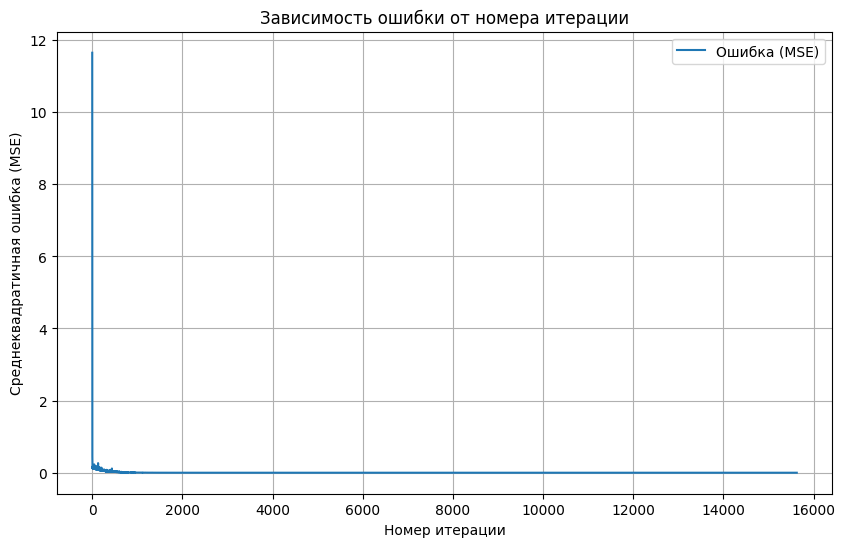

In [24]:
# Убираем ограничение на порог tol
tol_example = 0  # Отменяем условие ранней остановки

# Запуск SGD с 10^5 итераций
max_iter_example = 100000  # Устанавливаем 10^5 итераций

w_final, errors = stochastic_gradient_descent(
    X_example, y_example, w_init_example, eta_example, max_iter_example, tol_example
)

# Проверка результата
print("Итоговый вектор весов:", w_final)
print("Общее количество итераций выполнено:", len(errors))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label="Ошибка (MSE)")
plt.xlabel("Номер итерации")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.title("Зависимость ошибки от номера итерации")
plt.grid(True)
plt.legend()
plt.show()


**Выведите вектор весов, к которому сошелся метод.**

In [21]:
# Вывод итогового вектора весов
print("Итоговый вектор весов:", w_final)

Итоговый вектор весов: [1. 3.]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [22]:
# Среднеквадратичная ошибка на последней итерации
mse_final = errors[-1]  # Последнее значение MSE из списка ошибок
print("Среднеквадратичная ошибка на последней итерации:", mse_final)


Среднеквадратичная ошибка на последней итерации: 2.2330403447319693e-23
